In [1]:
from ngsolve import *
from ngsolve.meshes import Make1DMesh
from ngsolve.la import EigenValues_Preconditioner
from ngsolve.webgui import Draw
import numpy as np
import math
import scipy.linalg
from random import random
import scipy.sparse as sp

In [2]:
mesh = Make1DMesh(500)
# Draw(mesh)

In [3]:
w = H1(mesh, order=2, dirichlet="left|right")
sigma = H1(mesh, order=2, dirichlet=" ")
fesm = w*sigma

In [4]:
w, sigma = fesm.TrialFunction()
v , tau = fesm.TestFunction()

In [5]:
a = BilinearForm(fesm,symmetric=True)
a += (grad(sigma)*grad(v) + sigma*tau + grad(w)*grad(tau))*dx

m = BilinearForm(fesm,symmetric=True)
m += -grad(w)*grad(v)*dx

a.Assemble()
m.Assemble()

u = GridFunction(fesm, multidim=3)

In [6]:
with TaskManager():
    lam = ArnoldiSolver(a.mat, m.mat, fesm.FreeDofs(),list(u.vecs), shift=1)

In [7]:
print('lam', lam)

lam  (39.4785,-3.4745e-17)
 (80.7516,-9.92342e-16)
 (163.864,2.74131e-14)



In [8]:
gfu = []
for i in range(len(u.vecs)):
    gfu.append(GridFunction(fesm))
    gfu[i].vec.data = u.vecs[i]
    Draw(gfu[i].components[0],mesh, deformation=CF((0,100*gfu[i].components[0],0)))

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.23…

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.23…

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.23…

## Locally Optimal Block Preconditioned Conjugate Gradient (LOBPCG)

In [9]:
mesh = Make1DMesh(100)

fesw = H1(mesh, order=2, dirichlet="left|right")
fessigma = H1(mesh, order=2, dirichlet=" ")

w,v = fesw.TnT()
sigma,tau = fessigma.TnT()

a = BilinearForm(sigma*tau*dx).Assemble()
b = BilinearForm(grad(w)*grad(tau)*dx).Assemble()

k = BilinearForm(grad(w)*grad(v)*dx).Assemble()

S = b.mat.T @ a.mat.Inverse() @ b.mat
print (S.GetOperatorInfo())

pre = b.mat.Inverse(fesw.FreeDofs())
pre = pre@pre   # precond for 4th order problem
evals, evecs = solvers.LOBPCG(S, b.mat, pre=pre, num=5, maxit=100)

ProductMatrix, h = 201, w = 201
  ProductMatrix, h = 201, w = 201
    Transpose, h = 201, w = 201
      SparseMatrixd, h = 201, w = 201
    N4ngla14UmfpackInverseIdddEE, h = 201, w = 201
  SparseMatrixd, h = 201, w = 201

0 : [771.0185353193057, 1616.229005780663, 4379.911964012152, 23395.323672756203, 52655.483208931946]
1 : [259.5004526369943, 864.4871218388827, 2012.2881646728938, 5495.780369396801, 13109.083562586346]
2 : [94.79801338043264, 337.045361292066, 900.4469304971827, 2701.753749748921, 4747.352938143724]
3 : [56.49782092575205, 140.72322946049434, 354.65240664735336, 1611.4157293498454, 2953.117756001007]
4 : [46.70875731542343, 108.26566984453085, 258.243213939586, 668.171200648972, 2051.858654906919]
5 : [42.76681694340426, 99.77158252702425, 215.92090394318834, 348.86697104107924, 1079.9828163137797]
6 : [40.954767832183045, 92.11146581532896, 188.18366189523957, 289.5539589017474, 693.4557977678725]
7 : [40.45156476860716, 86.08107545466079, 180.71809731393327, 270.7

78 : [39.47842150086291, 80.76302543791175, 157.9142813723385, 238.73747186462296, 361.6358036814863]
79 : [39.478421237271846, 80.76301825764732, 157.91424901914576, 238.73654346549236, 361.5147097580484]
80 : [39.47842096013426, 80.76301376200996, 157.91422744475824, 238.7358871557554, 361.3764312173275]
81 : [39.47842078253738, 80.76300951149102, 157.91420697582763, 238.73515687559757, 361.24443799100663]
82 : [39.47842065277319, 80.76300478686403, 157.91418067407312, 238.7342045282925, 361.11780020224063]
83 : [39.478420463774945, 80.76299962850614, 157.91415457760496, 238.73315273620028, 360.8954253032992]
84 : [39.4784202977727, 80.76299448742184, 157.91412767814367, 238.73220174860117, 360.69504208235253]
85 : [39.478420115856466, 80.76298967091564, 157.9141016298276, 238.7315514927011, 360.53899909343]
86 : [39.478419931041266, 80.76298289963215, 157.91405540093265, 238.7306864882368, 360.36537754662163]
87 : [39.47841969963517, 80.76297493112115, 157.9140082438583, 238.7297578

In [10]:
for i in range(5):
    gfw = GridFunction(fesw)
    gfw.vec.data = evecs[i]
    Draw(gfw,mesh, deformation=CF((0,gfw,0)))

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.23…

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.23…

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.23…

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.23…

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.23…

In [11]:
import numpy as np
import matplotlib.pyplot as plt
x=np.linspace(0,1,100)

Text(0.5, 1.0, 'First mode shape')

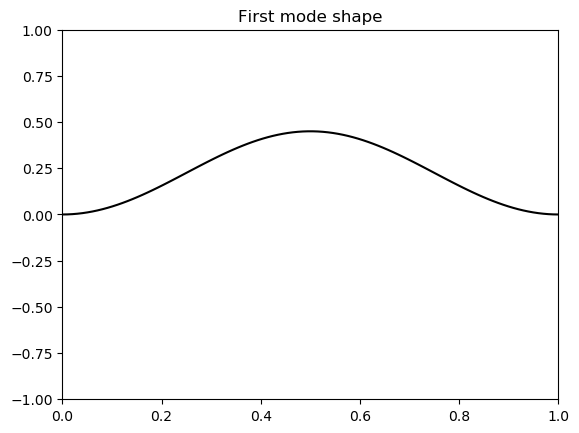

In [12]:
gfw.vec.data = evecs[0]
plt.plot(x,gfw(mesh(x)),color='black',label='  ',linestyle="-")
plt.ylim([-1, 1])
plt.xlim([0, 1.0])
plt.title("First mode shape")

Text(0.5, 1.0, 'Second mode shape')

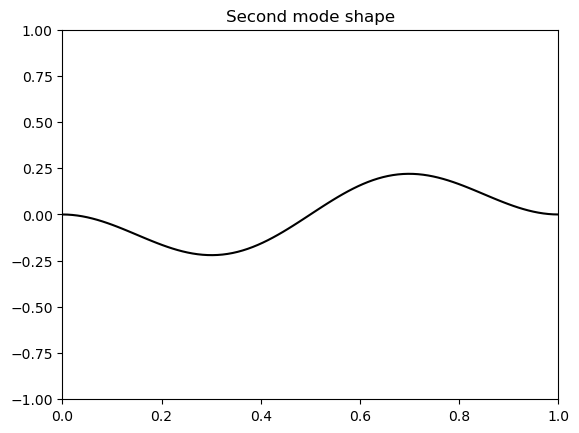

In [13]:
gfw.vec.data = evecs[1]
plt.plot(x,gfw(mesh(x)),color='black',label='  ',linestyle="-")
plt.ylim([-1, 1])
plt.xlim([0, 1.0])
plt.title("Second mode shape")

Text(0.5, 1.0, 'Third mode shape')

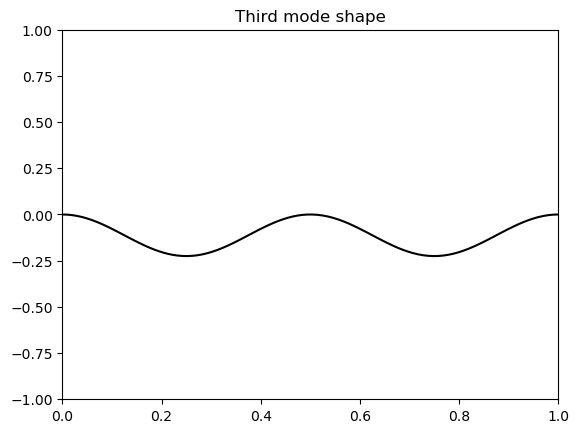

In [14]:
gfw.vec.data = evecs[2]
plt.plot(x,gfw(mesh(x)),color='black',label='  ',linestyle="-")
plt.ylim([-1, 1])
plt.xlim([0, 1.0])
plt.title("Third mode shape")

Text(0.5, 1.0, 'Fourth mode shape')

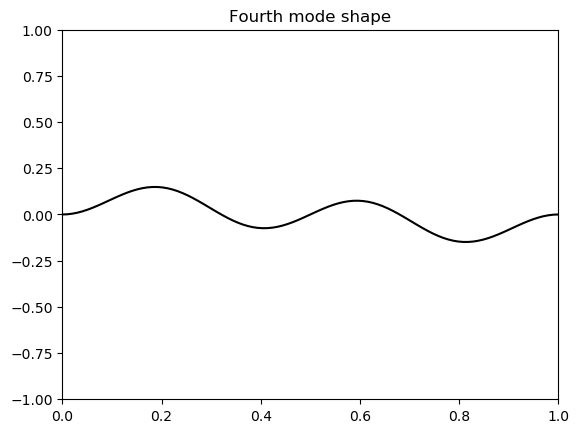

In [15]:
gfw.vec.data = evecs[3]
plt.plot(x,gfw(mesh(x)),color='black',label='  ',linestyle="-")
plt.ylim([-1, 1])
plt.xlim([0, 1.0])
plt.title("Fourth mode shape")